In [2]:
import spotipy
import requests
from spotipy.oauth2 import SpotifyClientCredentials
from datascience import *
import numpy as np
import csv
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

In [3]:
client_id = "a6baf8a584134ff3b272d789974bffe4"
client_secret = "0d3cd888a21e488d98dd767079471ea7"
client_credentials_manager = SpotifyClientCredentials(client_id, client_secret)
token = client_credentials_manager.get_access_token()

In [4]:
d12 = Table().read_table("../data/cleandata/top_songs_2012.csv")
d13 = Table().read_table("../data/cleandata/top_songs_2013.csv")
d14 = Table().read_table("../data/cleandata/top_songs_2014.csv")
d15 = Table().read_table("../data/cleandata/top_songs_2015.csv")
d16 = Table().read_table("../data/cleandata/top_songs_2016.csv")

3 - danceability, 4 - energy, 6 - loudness, 7 - mode, 8 - speechiness, 9 - acousticness, 10 - instrumentalness, 11 - liveness, 12 - valience

In [5]:
def attribute(year):
    d = Table().read_table("../data/cleandata/top_songs_" + str(year) + ".csv")
    features = [year]
    columns = [3, 4, 6, 7, 8, 9, 10, 11]
    for col in columns:
        features += [np.mean(d.column(col))]
    return features

In [6]:
mean_data = Table().with_columns("year", [],
                     "danceability", [],
                     "energy", [],
                     "mode", [],
                     "speechiness", [],
                     "acousticness", [],
                     "instrumentalness", [],
                     "liveness", [],
                     "valience", [])
years = [2012, 2013, 2014, 2015, 2016]
for year in years:
    mean_data = mean_data.with_row(attribute(year))
mean_data

year,danceability,energy,mode,speechiness,acousticness,instrumentalness,liveness,valience
2012,0.65165,0.73668,-5.18692,0.63,0.086123,0.111053,0.00255943,0.189717
2013,0.63636,0.70664,-5.58481,0.68,0.074624,0.12694,0.00633062,0.170676
2014,0.65464,0.69486,-5.47043,0.68,0.080718,0.138457,0.00649905,0.167796
2015,0.65334,0.65451,-5.9646,0.62,0.093221,0.17243,0.000844622,0.184377
2016,0.66189,0.628465,-6.42864,0.5,0.119507,0.180886,0.00438409,0.176729


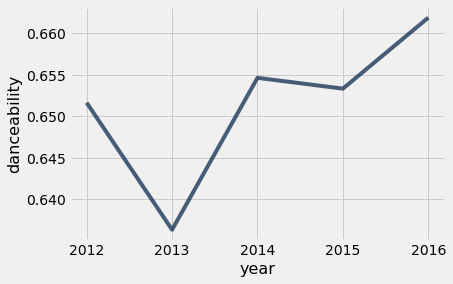

In [8]:
mean_data.plot("year","danceability")